In [10]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class Neuron:
    def __init__(self, num_inputs):
        # Initialize weights and bias (randomly for demonstration)
        self.weights = torch.randn(num_inputs)
        self.bias = torch.tensor(0.0)

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def forward(self, inputs):
        weighted_sum = torch.dot(self.weights, inputs) + self.bias
        output = self.sigmoid(weighted_sum)
        return output

In [18]:
neuron = Neuron(num_inputs=3)
neuron.weights = torch.tensor([0.5, -0.6, 0.2])
neuron.bias = 0.1

test_inputs = [
    torch.tensor([1.0, 0.0, 1.0]),
    torch.tensor([0.0, 1.0, 1.0]),
    torch.tensor([1.0, 1.0, 0.0]),
    torch.tensor([0.0, 0.0, 0.0]),
    torch.tensor([2.0, 3.0, 1.0])
]

for input in test_inputs:
    output = neuron.forward(input)
    print(f"Inputs: {input.numpy()}, Output: {output.item()}")

Inputs: [1. 0. 1.], Output: 0.6899744868278503
Inputs: [0. 1. 1.], Output: 0.4255574941635132
Inputs: [1. 1. 0.], Output: 0.5
Inputs: [0. 0. 0.], Output: 0.5249791741371155
Inputs: [2. 3. 1.], Output: 0.3775406777858734


### Adding a function to select the desired activation function

In [25]:
class Neuron:
    def __init__(self, num_inputs, activation):
        # Initialize weights and bias (randomly for demonstration)
        self.weights = torch.randn(num_inputs)
        self.bias = torch.tensor(0.0)
        self.activation_name = activation

    def activate(self, x):
        if self.activation_name == 'sigmoid':
            return 1 / (1 + torch.exp(-x))
        elif self.activation_name == 'relu':
            return torch.maximum(torch.tensor(0.0), x)
        elif self.activation_name == 'tanh':
            return torch.tanh(x)
        else:
            return x  # Linear activation

    def forward(self, inputs):
        weighted_sum = torch.dot(self.weights, inputs) + self.bias
        output = self.activate(weighted_sum)
        return output

In [29]:
activations = ['sigmoid', 'relu', 'tanh', 'linear']

for act in activations:
    neuron = Neuron(num_inputs=1, activation=act)
    neuron.weights = torch.tensor([1.0])
    neuron.bias = 0.0

    test_inputs = torch.tensor([2.0])
    output = neuron.forward(test_inputs)
    print(f"Activation: {act}, Input: {test_inputs.item()}, Output: {output:.4f}")

Activation: sigmoid, Input: 2.0, Output: 0.8808
Activation: relu, Input: 2.0, Output: 2.0000
Activation: tanh, Input: 2.0, Output: 0.9640
Activation: linear, Input: 2.0, Output: 2.0000


### Neurons to Layer

In [35]:
# Inputs                  Neuron 1                     Neuron 2
# -------                 --------                     --------
# x₁ = 2.0  ──(0.4)──┐
#                     ├─► ( Σ ) + 0.1 ──► 1.5
# x₂ = 3.0  ──(0.2)──┘


# x₁ = 2.0  ──(0.6)──┐
#                     ├─► ( Σ ) - 0.3 ──► 2.4
# x₂ = 3.0  ──(0.5)──┘


In [37]:
inputs = torch.tensor([2.0, 3.0]) # 2 inputs

weights = torch.tensor([[0.4, 0.6],
                       [0.2, 0.5]]) # weights for each of the 2 neurons

biases = torch.tensor([0.1, -0.3]) # biases for each of the 2 neurons

# Forward pass
outputs = inputs @ weights + biases

# Apply activation function
activation = torch.sigmoid(outputs)
print(f"Outputs after activation: {activation}")

Outputs after activation: tensor([0.8176, 0.9168])


### Complete layer with forward pass

In [38]:
class Layer:
    def __init__(self, num_inputs, num_neurons, activation='sigmoid'):
        self.num_neurons = num_neurons
        self.weights = torch.randn(num_inputs, num_neurons)
        self.biases = torch.zeros(num_neurons)
        self.activation_name = activation

    def activate(self, x):
        if self.activation_name == 'sigmoid':
            return 1 / (1 + torch.exp(-x))
        elif self.activation_name == 'relu':
            return torch.maximum(torch.tensor(0.0), x)
        elif self.activation_name == 'tanh':
            return torch.tanh(x)
        else:
            return x  # Linear activation

    def forward(self, inputs):
        weighted_sum = inputs @ self.weights.T + self.biases
        output = self.activate(weighted_sum)
        return output

In [42]:
activations = ['sigmoid', 'relu', 'tanh', 'linear']
for act in activations:
    layer = Layer(num_inputs=2, num_neurons=3, activation=act)
    layer.weights = torch.tensor([[0.4, 0.6],
                                  [0.2, 0.5],
                                  [0.3, 0.9]])
    layer.biases = torch.tensor([0.1, -0.3, 0.2])
    inputs = torch.tensor([2.0, 3.0])
    output = layer.forward(inputs)
    print(f"Activation: {act}, Inputs: {inputs}, Outputs: {output}")
    print(f"Weights :\n{layer.weights}\nBiases: {layer.biases}\n")


Activation: sigmoid, Inputs: tensor([2., 3.]), Outputs: tensor([0.9370, 0.8320, 0.9707])
Weights :
tensor([[0.4000, 0.6000],
        [0.2000, 0.5000],
        [0.3000, 0.9000]])
Biases: tensor([ 0.1000, -0.3000,  0.2000])

Activation: relu, Inputs: tensor([2., 3.]), Outputs: tensor([2.7000, 1.6000, 3.5000])
Weights :
tensor([[0.4000, 0.6000],
        [0.2000, 0.5000],
        [0.3000, 0.9000]])
Biases: tensor([ 0.1000, -0.3000,  0.2000])

Activation: tanh, Inputs: tensor([2., 3.]), Outputs: tensor([0.9910, 0.9217, 0.9982])
Weights :
tensor([[0.4000, 0.6000],
        [0.2000, 0.5000],
        [0.3000, 0.9000]])
Biases: tensor([ 0.1000, -0.3000,  0.2000])

Activation: linear, Inputs: tensor([2., 3.]), Outputs: tensor([2.7000, 1.6000, 3.5000])
Weights :
tensor([[0.4000, 0.6000],
        [0.2000, 0.5000],
        [0.3000, 0.9000]])
Biases: tensor([ 0.1000, -0.3000,  0.2000])



In [8]:
# MSE Loss
y_pred = torch.tensor([2.5, 1.0, 3.0, 5.0])
y_true = torch.tensor([1.0, 0.5, 0.0, 7.0])

criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)
print(f"MSE Loss: {loss.item()}")

MSE Loss: 3.875


In [7]:
# softmax
logits = torch.tensor([2.5, 1.0, 3.0, 5.0])
softmax = nn.Softmax(dim=0)
probs = softmax(logits)
print(f"Softmax Probabilities:\n{probs}")

Softmax Probabilities:
tensor([0.0664, 0.0148, 0.1095, 0.8092])


### Linear Layer with Backpropagation

In [12]:
class Linear:
    def __init__(self, in_features, out_features): # in_features - number of input features, out_features - number of output neurons
        # weights & biases initialization
        self.W = torch.randn(out_features, in_features) # learnable weight matrix
        self.b = torch.zeros(out_features)
        
        # gradients storage
        self.grad_W = None
        self.grad_b = None

        self.input_cache = None
    
    def forward(self, x):
        self.input_cache = x
        return x @ self.W.T + self.b
    
    def backward(self, grad_output):
        self.grad_W =  grad_output.T @ self.input_cache
        self.grad_b = grad_output.sum(dim=0)
        grad_input = grad_output @ self.W # dL/dX = dL/dY @ W
        return grad_input
        

In [16]:
# X
#  ↓ forward
# Linear.forward
#  ↓ y_pred
# MSE loss
#  ↓ dL/dy (manual)
# Linear.backward
#  ↓ grad_W, grad_b
# SGD update


Initial weights(W): -0.8791, bias(b): 0.0000
Epoch 10/100, Loss: 5.7640
Epoch 20/100, Loss: 3.8849
Epoch 30/100, Loss: 2.6207
Epoch 40/100, Loss: 1.7692
Epoch 50/100, Loss: 1.1956
Epoch 60/100, Loss: 0.8092
Epoch 70/100, Loss: 0.5489
Epoch 80/100, Loss: 0.3736
Epoch 90/100, Loss: 0.2555
Epoch 100/100, Loss: 0.1760
Trained weights(W): 2.0132, bias(b): 2.5864


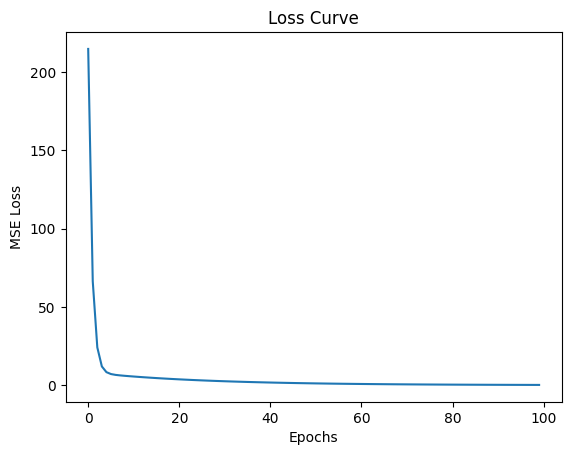

In [20]:
# dummy data
X = torch.randn(100,1)*5 # inputs 0 to 5 with 100 samples 
Y = X*2 +3 + torch.randn(100,1)*0.1 # outputs with some noise

# initialize model
model = Linear(in_features=1, out_features=1)
criterion = nn.MSELoss()
learning_rate = 0.01
epochs = 100

losses = []

print(f"Initial weights(W): {model.W.item():.4f}, bias(b): {model.b.item():.4f}")

for epoch in range(epochs):
    # forward passs
    y_pred = model.forward(X)
    loss = criterion.forward(y_pred, Y)
    losses.append(loss.item())

    # compute gradient of loss w.r.t. predictions 
    grad_loss = 2 * (y_pred - Y) / X.shape[0]
    
    # backward pass
    model.backward(grad_loss)

    # update weights and biases
    model.W -= learning_rate * model.grad_W
    model.b -= learning_rate * model.grad_b

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

print(f"Trained weights(W): {model.W.item():.4f}, bias(b): {model.b.item():.4f}")

# Plotting the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.show()

In [22]:
# neural network using nn.Module

# dummy data
X = torch.randn(100,1)*5 # inputs 0 to 5 with 100 samples 
Y = X*2 +3 + torch.randn(100,1)*0.1 # outputs with some noise

# model
model = nn.Linear(1,1)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# training loop
epochs = 100
losses = []

for epoch in range(epochs):

    optimizer.zero_grad()

    # forward pass
    y_pred = model(X)

    # compute loss
    loss = criterion(y_pred, Y)
    losses.append(loss.item())

    # backward pass and optimization
    loss.backward()

    # update weights
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

print(f"Training complete. Final loss: {loss.item():.4f}")
print(f"Trained weights(W): {model.weight.item():.4f}, bias(b): {model.bias.item():.4f}")
    

Epoch 10/100, Loss: 9.5592
Epoch 20/100, Loss: 6.4025
Epoch 30/100, Loss: 4.2893
Epoch 40/100, Loss: 2.8745
Epoch 50/100, Loss: 1.9272
Epoch 60/100, Loss: 1.2930
Epoch 70/100, Loss: 0.8683
Epoch 80/100, Loss: 0.5840
Epoch 90/100, Loss: 0.3936
Epoch 100/100, Loss: 0.2662
Training complete. Final loss: 0.2662
Trained weights(W): 2.0075, bias(b): 2.5010


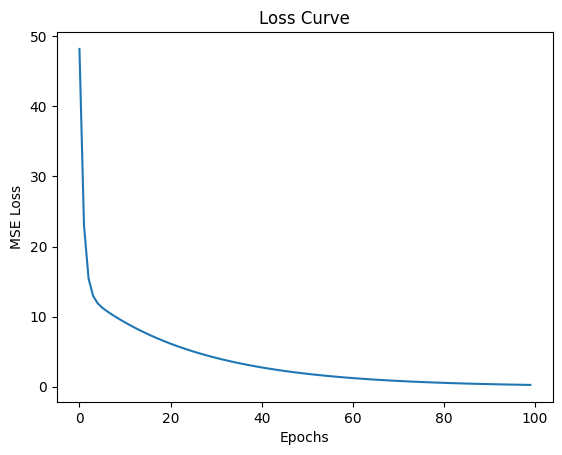

In [23]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.show()